In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [ ]:
df = pd.read_csv('yield_df.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
print("Dataset shape:", df.shape)
df.info()
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Andhra Pradesh,Arecanut,2000,724,935.6,68.12,16.37
1,1,Andhra Pradesh,Arhar/Tur,2000,216457,935.6,131915.16,16.37
2,2,Andhra Pradesh,Arhar/Tur,2000,2701,935.6,1585.48,16.37
3,3,Andhra Pradesh,Bajra,2000,135964,935.6,33663.50,16.37
4,4,Andhra Pradesh,Bajra,2000,12524,935.6,3699.54,16.37


In [ ]:
df.isnull().sum()

# Check for duplicates and remove them
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"After removing duplicates, shape: {df.shape}")

In [ ]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True

(19689, 7)

In [ ]:
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index
df = df.drop(to_drop)
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           19689 non-null  object 
 1   Item                           19689 non-null  object 
 2   Year                           19689 non-null  int64  
 3   hg/ha_yield                    19689 non-null  int64  
 4   average_rain_fall_mm_per_year  19689 non-null  float64
 5   pesticides_tonnes              19689 non-null  float64
 6   avg_temp                       19689 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


In [ ]:
# 1. Population data (simulated)
np.random.seed(42)
df['population'] = np.random.normal(1000000, 500000, size=len(df))


Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [ ]:
seasons = ['kharif', 'rabi', 'summer', 'saith']
df['season'] = np.random.choice(seasons, size=len(df))

3

In [ ]:
# 2. Count of records by area
plt.figure(figsize=(15, 10))
area_counts = df['Area'].value_counts()
sns.barplot(x=area_counts.index, y=area_counts.values)
plt.title('Number of Records by Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 3. Count of records by crop
plt.figure(figsize=(12, 6))
crop_counts = df['Item'].value_counts()
sns.barplot(x=crop_counts.index, y=crop_counts.values)
plt.title('Number of Records by Crop Type')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

0

In [ ]:
# 4. Total yield by area
plt.figure(figsize=(15, 10))
area_yield = df.groupby('Area')['hg/ha_yield'].sum().sort_values(ascending=False)
sns.barplot(x=area_yield.index, y=area_yield.values)
plt.title('Total Yield by Area')
plt.xlabel('Area')
plt.ylabel('Total Yield (hg/ha)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 5. Correlation between numeric variables
numeric_cols = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'population', 'hg/ha_yield']
plt.figure(figsize=(10, 8))
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Define features and target
X = df[['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'season', 'population']]
y = df['hg/ha_yield']

In [ ]:
# Define numerical and categorical features
numerical_features = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'population']
categorical_features = ['Area', 'Item', 'season']


30

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

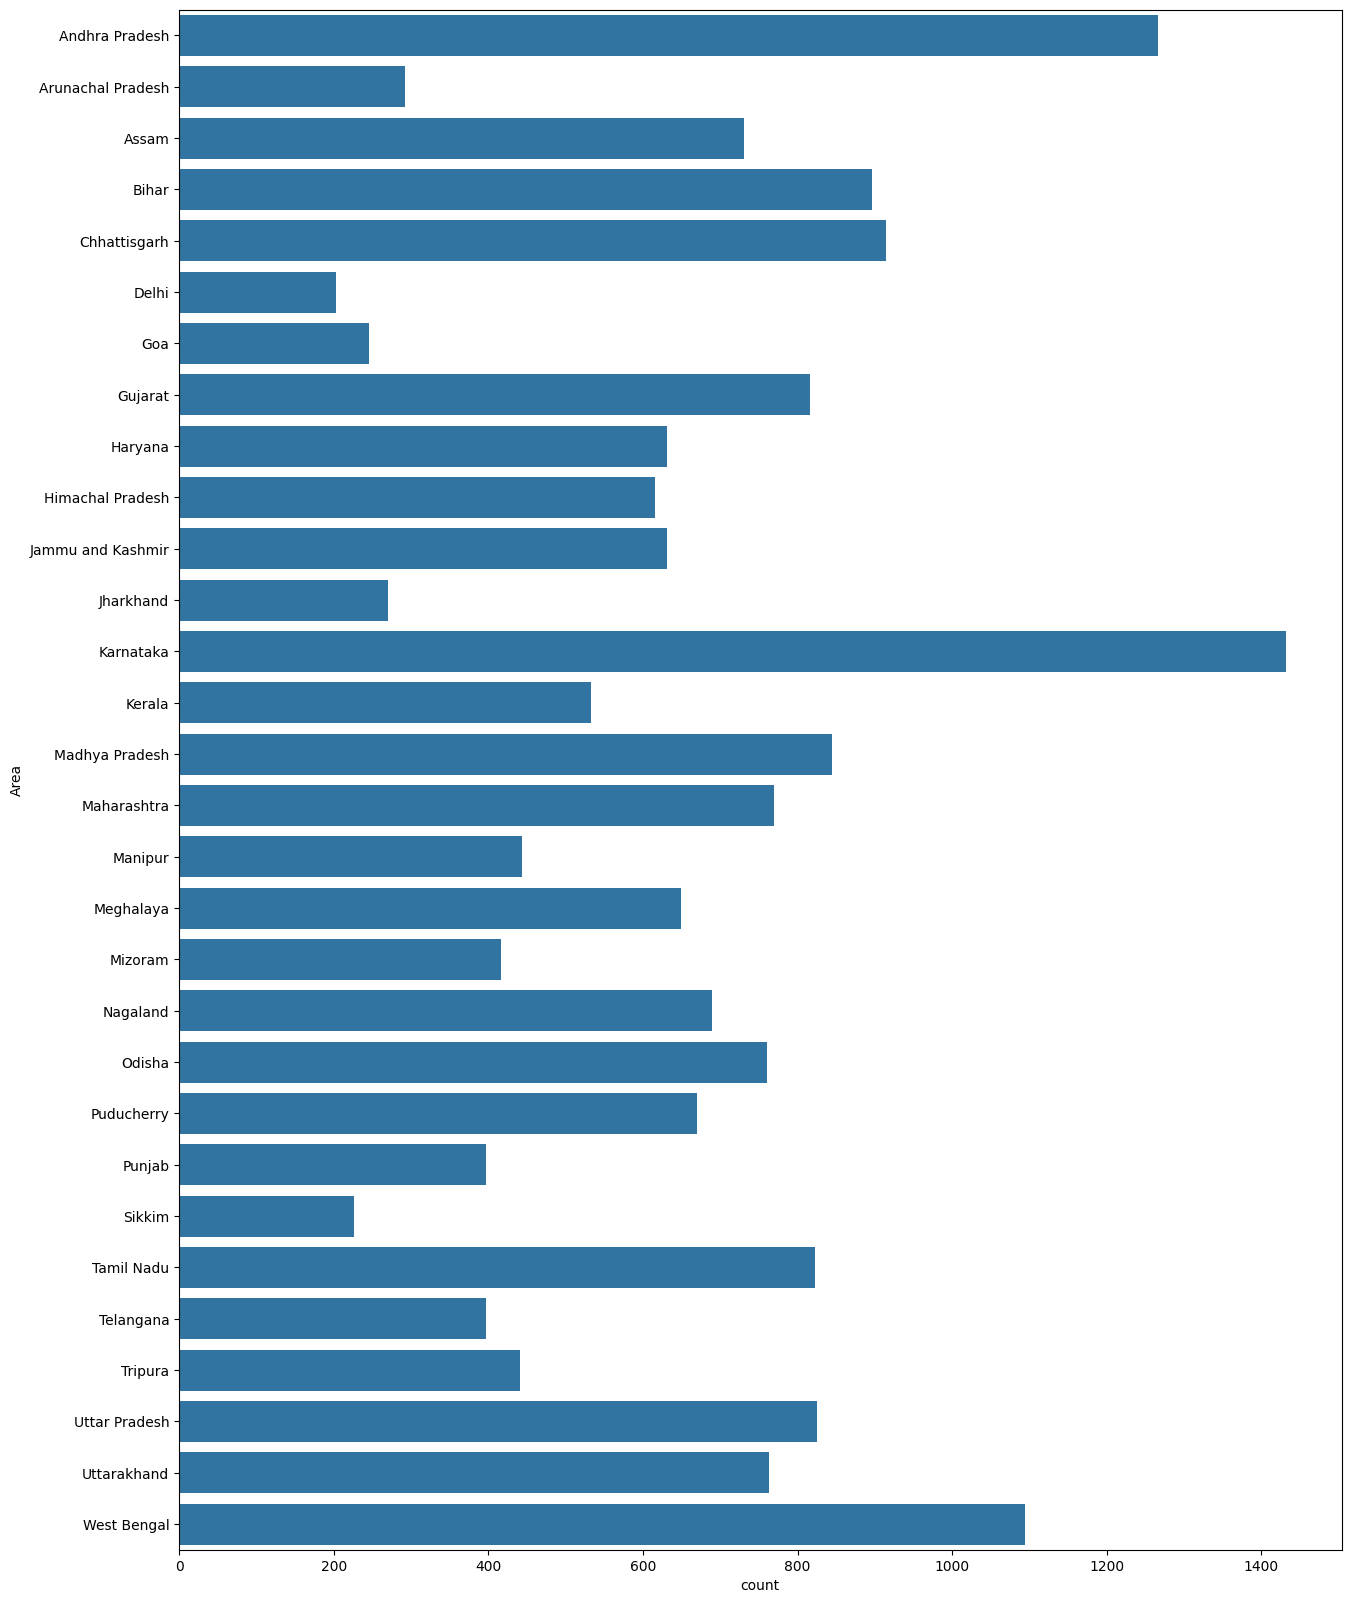

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Process the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

10

In [ ]:
# Build the Artificial Neural Network model
# Based on the paper's description
model = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',             # ReLU activation function
    solver='adam',                 # Adam optimizer
    alpha=0.0001,                  # L2 penalty parameter
    batch_size='auto',
    learning_rate='adaptive',
    max_iter=1000,
    random_state=42
)

In [ ]:
# Train the model
model.fit(X_train_processed, y_train)

# Make predictions
y_pred_train = model.predict(X_train_processed)
y_pred_test = model.predict(X_test_processed)


323607146122

In [ ]:
# Calculate performance metrics as described in the paper
# 1. Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# 2. Mean Absolute Deviation (MAD)
mad = mean_absolute_error(y_test, y_pred_test)

# 3. Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# 4. Coefficient of Determination (R^2)
r2 = r2_score(y_test, y_pred_test)

print("Model Performance Metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"MAD: {mad:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R^2: {r2:.2f}")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.text(0.05, 0.95, f'RMSE: {rmse:.2f}\nMAD: {mad:.2f}\nMAPE: {mape:.2f}%\nR²: {r2:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8))
plt.show()

# Save the model and preprocessor for use in the Flask app
joblib.dump(model, 'ann_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

# Function to predict famine year and major factor
def predict_famine_year(area):
    # Filter data for the area
    area_data = df[df['Area'] == area]
    
    if area_data.empty:
        return "No data available for this area", "Unknown"
    
    # Get the latest 5 years of data for the area
    latest_years = sorted(area_data['Year'].unique())[-5:]
    
    # Calculate average yield for the area by year
    yearly_yields = area_data[area_data['Year'].isin(latest_years)].groupby('Year')['hg/ha_yield'].mean()
    
    # Determine if there's a declining trend
    if len(yearly_yields) >= 3:
        # Check if there's a consistent declining trend
        is_declining = all(yearly_yields.iloc[i] > yearly_yields.iloc[i+1] for i in range(len(yearly_yields)-1))
        
        if is_declining:
            # Predict the next year after the latest as potential famine year
            predicted_year = int(max(latest_years)) + 1
            
            # Determine major factor
            # Check which factor has the strongest correlation with declining yields
            factors = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'population']
            correlations = {}
            
            for factor in factors:
                if factor in area_data.columns:
                    correlation = area_data[factor].corr(area_data['hg/ha_yield'])
                    correlations[factor] = abs(correlation)
            
            if correlations:
                major_factor = max(correlations, key=correlations.get)
                
                # Make the factor name more readable
                factor_names = {
                    'average_rain_fall_mm_per_year': 'Rainfall Changes',
                    'pesticides_tonnes': 'Pesticide Usage',
                    'avg_temp': 'Temperature Changes',
                    'population': 'Population Growth'
                }
                
                return predicted_year, factor_names.get(major_factor, major_factor)
            else:
                return predicted_year, "Multiple Factors"
        else:
            # No consistent decline, use longest future projection
            return int(max(latest_years)) + 5, "Projected Future Risk"
    else:
        # Not enough data for trend analysis
        return int(max(latest_years)) + 3, "Insufficient Historical Data"

# Test the famine prediction function
for area in df['Area'].unique()[:5]:  # Test with first 5 areas
    predicted_year, major_factor = predict_famine_year(area)
    print(f"Area: {area}, Predicted Famine Year: {predicted_year}, Major Factor: {major_factor}")

# Feature importance analysis
# We can't directly get feature importance from MLPRegressor
# So we'll analyze the correlation of features with the target

# Create a list to store feature importance
feature_importance = []

# Get numerical feature importance through correlation
for feature in numerical_features:
    correlation = abs(df[feature].corr(df['hg/ha_yield']))
    feature_importance.append((feature, correlation))

# For categorical features, we'll compare group means
for feature in categorical_features:
    feature_stats = df.groupby(feature)['hg/ha_yield'].mean()
    # Calculate the range of means as a measure of feature impact
    feature_impact = feature_stats.max() - feature_stats.min()
    feature_importance.append((feature, feature_impact))

# Sort by importance
feature_importance.sort(key=lambda x: x[1], descending=True)

# Plot feature importance
plt.figure(figsize=(12, 6))
features, importance = zip(*feature_importance)
sns.barplot(x=list(features), y=list(importance))
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

print("Top 3 factors influencing crop yield:")
for i, (feature, importance) in enumerate(feature_importance[:3]):
    print(f"{i+1}. {feature}: {importance:.4f}")

[26076218605,
 9522010,
 3637714928,
 544953534,
 143096606,
 2666022,
 2193998349,
 807480178,
 589739640,
 32297151,
 30298377,
 43793850,
 63772797366,
 129700649755,
 834490323,
 1878564915,
 18764635,
 16516629,
 2769208,
 18748702,
 194080325,
 493815573,
 781551409,
 2744927,
 78051759253,
 147700034,
 16952054,
 4442585302,
 179697342,
 8941179120]